/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wmalik/Documents/MSc/

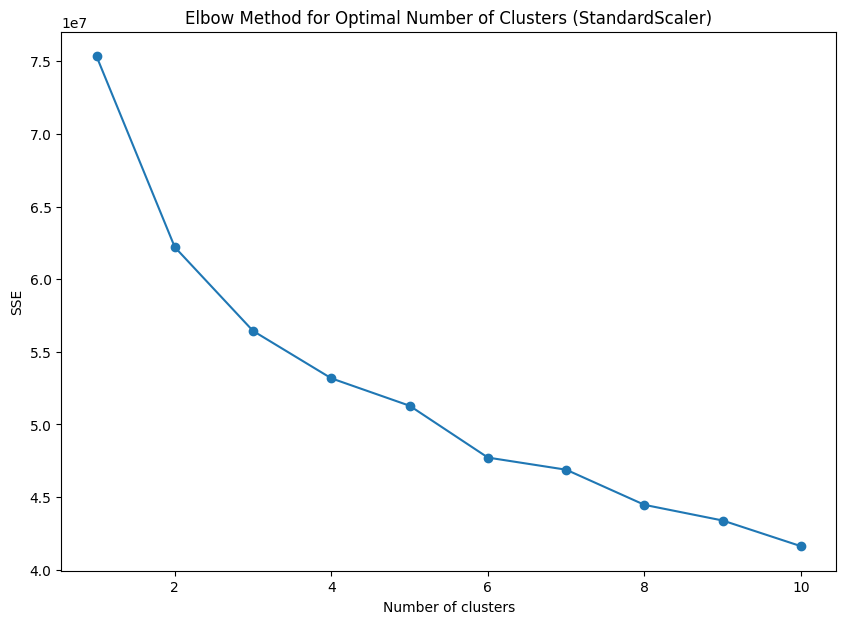

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Load dataset
merged_df = pd.read_csv('merged_df.csv')

# Extract features for normalization
features = merged_df.drop(columns=['investor_uuid', 'investor_country_code'])

# Apply StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters (StandardScaler)')
plt.show()




/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


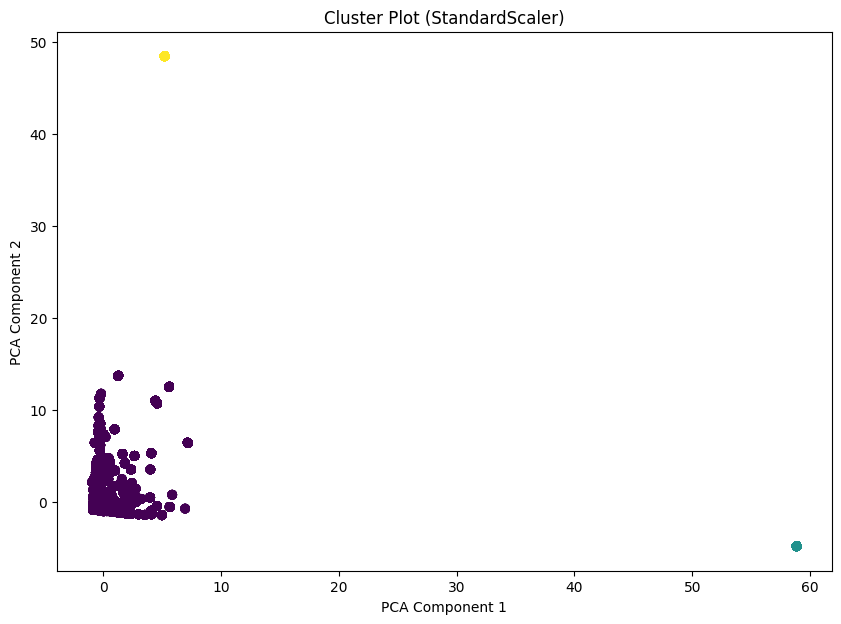

In [7]:
# Run KMeans clustering with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

merged_df['cluster'] = clusters

# Plot the clusters
pca = PCA(n_components=2)
pca_features = pca.fit_transform(normalized_features)
plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Plot (StandardScaler)')
plt.show()


In [8]:
# Evaluate the clustering result using silhouette score and Davies-Bouldin score
silhouette_avg = silhouette_score(normalized_features, clusters)
davies_bouldin_avg = davies_bouldin_score(normalized_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')

Silhouette Score: 0.8558856522687771
Davies-Bouldin Score: 0.08996488850474872
